In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Cav1.2 WT 
csv_file_wt_vanilla='https://raw.githubusercontent.com/adrishg/vgci_mutants/refs/heads/main/cav12/dataDistances/26-02-10_Cav12_wt_vanillaAF2_distances_all.csv'
df_wt_vanilla = pd.read_csv(csv_file_wt_vanilla)

csv_file_wt_masked='https://raw.githubusercontent.com/adrishg/vgci_mutants/refs/heads/main/cav12/dataDistances/26-02-10_Cav12_wt_maskedAF2_distances_all.csv'
df_wt_masked=pd.read_csv(csv_file_wt_masked)

#Cav1.2 g402s
csv_file_g402s_vanilla='https://raw.githubusercontent.com/adrishg/vgci_mutants/refs/heads/main/cav12/dataDistances/26-02-10_Cav12_g402s_vanillaAF2_distances_all.csv'
df_g402s_vanilla=pd.read_csv(csv_file_g402s_vanilla) 

csv_file_g402s_masked='https://raw.githubusercontent.com/adrishg/vgci_mutants/refs/heads/main/cav12/dataDistances/26-02-10_Cav12_g402s_maskedAF2_distances_all.csv'
df_g402s_masked=pd.read_csv(csv_file_g402s_masked)

#Cav1.2 g406r
csv_file_g406r_vanilla='https://raw.githubusercontent.com/adrishg/vgci_mutants/refs/heads/main/cav12/dataDistances/26-02-10_Cav12_g406r_vanillaAF2_distances_all.csv'
df_g406r_vanilla=pd.read_csv(csv_file_g406r_vanilla) 

csv_file_g406r_masked='https://raw.githubusercontent.com/adrishg/vgci_mutants/refs/heads/main/cav12/dataDistances/26-02-10_Cav12_g406r_maskedAF2_distances_all.csv'
df_g406r_masked=pd.read_csv(csv_file_g406r_masked)


In [4]:
def plot_distances_by_alias_violin(
    df,
    alias_dict,
    exp_distances_list=None,
    title_custom_add='',
    colors=None,
    fig_width=6,
    fig_height=6,
    dataset_labels=None,
    pdb_colors=None
):
    """
    Plots the distribution of distances by alias based on the specified columns.
    """

    aliases_in_order = list(alias_dict.keys())
    plot_records = []

    for alias in aliases_in_order:
        column_name = alias_dict[alias]
        if column_name not in df.columns:
            print(f"Warning: Column '{column_name}' not found in the DataFrame; alias '{alias}' will still appear empty.")
            plot_records.append({"Alias": alias, "Distance": None})
            continue

        distances = df[column_name].dropna()
        for d in distances.tolist():
            plot_records.append({"Alias": alias, "Distance": d})

        if len(distances) == 0:
            plot_records.append({"Alias": alias, "Distance": None})

    if not plot_records:
        print("No distances found to plot after checking provided columns.")
        return

    plot_df = pd.DataFrame(plot_records)
    plot_df["Alias"] = pd.Categorical(plot_df["Alias"], categories=aliases_in_order, ordered=True)

    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})

    n_aliases = len(aliases_in_order)
    if colors is not None and len(colors) == n_aliases:
        palette = colors
    else:
        palette = sns.color_palette("coolwarm", n_aliases)

    plt.figure(figsize=(fig_width, fig_height))
    sns.violinplot(
        x='Alias',
        y='Distance',
        data=plot_df,
        order=aliases_in_order,
        palette=palette,
        inner='box',
        cut=0,
        linewidth=0.8
    )

    if exp_distances_list and dataset_labels:
        if pdb_colors and len(pdb_colors) == len(exp_distances_list):
            colors_for_pdb = pdb_colors
        else:
            colors_for_pdb = ['black'] * len(exp_distances_list)

        marker_styles = ['o', 's', 'D', '^', 'v', 'P', '*', 'X','d','<','>']
        used_label = [False] * len(exp_distances_list)

        for i, exp_distances_dict in enumerate(exp_distances_list):
            for alias, exp_distances in exp_distances_dict.items():
                if alias not in aliases_in_order:
                    continue
                xpos = aliases_in_order.index(alias)
                for exp_distance in exp_distances:
                    plt.scatter(
                        [xpos], [exp_distance],
                        facecolors='white',
                        edgecolors=colors_for_pdb[i],
                        s=36,
                        zorder=5,
                        marker=marker_styles[i % len(marker_styles)],
                        label=(dataset_labels[i] if not used_label[i] else None)
                    )
                    used_label[i] = True

    plt.title(f'Distribution of Distances {title_custom_add}', fontsize=18, weight='light', pad=20)
    plt.xlabel('Pair of αC', fontsize=24, weight='light')
    plt.ylabel('Distance (Å)', fontsize=24, weight='light')
    plt.grid(True, linestyle='--', linewidth=0.5, color='#dcdcdc')
    plt.xticks(rotation=45, ha='right', fontsize=12, weight='light')
    sns.despine()
    plt.tight_layout()

    handles, labels = plt.gca().get_legend_handles_labels()
    if any(lbl for lbl in labels):
        plt.legend(
            bbox_to_anchor=(1.05, 1),
            loc='upper left',
            borderaxespad=0.0
        )

    plt.show()


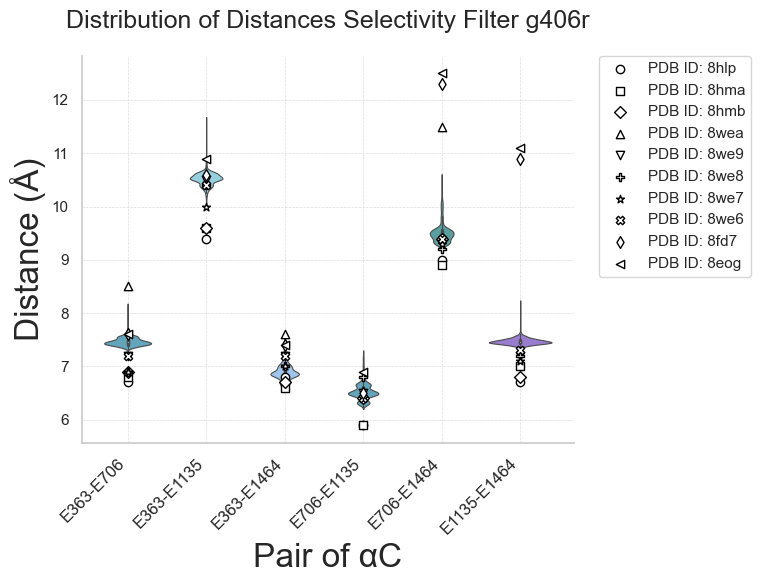

In [5]:
# Example usage
alias_dict = {
    'E363-E706': 'CA_GLU363_CA-GLU706_CA',
    'E363-E1135': 'CA_GLU363_CA-GLU1135_CA',
    'E363-E1464': 'CA_GLU363_CA-GLU1464_CA',
    'E706-E1135': 'CA_GLU706_CA-GLU1135_CA',
    'E706-E1464': 'CA_GLU706_CA-GLU1464_CA',
    'E1135-E1464': 'CA_GLU1135_CA-GLU1464_CA',
}

# Optional list of custom colors for the violin plots
custom_colors = ['#53acc9', '#89d7eb', '#91c7f9', '#53acc9', '#4dabae', '#9370DB']

# Experimental distances to overlay (multiple datasets with lists for each alias)
exp_distances_list = [
    { #8hlp
        'E363-E706': [6.7],
        'E363-E1135': [9.4],
        'E363-E1464': [6.8],
        'E706-E1135': [5.9],
        'E706-E1464': [9.0],
        'E1135-E1464': [6.7]
    },
    { #8hma
        'E363-E706': [6.8],
        'E363-E1135': [9.6],
        'E363-E1464': [6.6],
        'E706-E1135': [5.9],
        'E706-E1464': [8.9],
        'E1135-E1464': [7.0]
    },
    { #8hmb
        'E363-E706': [6.9],
        'E363-E1135': [9.6],
        'E363-E1464': [6.7],
        'E706-E1135': [6.4],
        'E706-E1464': [9.4],
        'E1135-E1464': [6.8]
    },
    { #8wea
        'E363-E706': [8.5],
        #'E363-E1135': [],
        'E363-E1464': [7.6],
        #'E706-E1135': [],
        'E706-E1464': [11.5],
        #'E1135-E1464': []
    },
    { #8we9
        'E363-E706': [7.2],
        'E363-E1135': [10.5],
        'E363-E1464': [7.2],
        'E706-E1135': [6.5],
        'E706-E1464': [9.3],
        'E1135-E1464': [7.2]
    },
    { #8we8
        'E363-E706': [6.9],
        'E363-E1135': [10.4],
        'E363-E1464': [7.0],
        'E706-E1135': [6.8],
        'E706-E1464': [9.2],
        'E1135-E1464': [7.2]
    },
    { #8we7
        'E363-E706': [6.9],
        'E363-E1135': [10.0],
        'E363-E1464': [7.0],
        'E706-E1135': [6.4],
        'E706-E1464': [9.3],
        'E1135-E1464': [7.1]
    },
    { #8we6
        'E363-E706': [7.2],
        'E363-E1135': [10.4],
        'E363-E1464': [7.2], 
        'E706-E1135': [6.4],
        'E706-E1464': [9.4],
        'E1135-E1464': [7.3]
    },
    { #8fd7
        'E363-E706': [7.6],
        'E363-E1135': [10.6], #E1115
        'E363-E1464': [7.4],#1416
        'E706-E1135': [6.5], #E1115
        'E706-E1464': [12.3],
        'E1135-E1464': [10.9]
    },
    { #8eog
        'E363-E706': [7.6],
        'E363-E1135': [10.9],
        'E363-E1464': [7.4],#1416
        'E706-E1135': [6.9],
        'E706-E1464': [12.5],
        'E1135-E1464': [11.1]
    }
]

# Labels for the datasets
dataset_labels = ['PDB ID: 8hlp', 'PDB ID: 8hma', 'PDB ID: 8hmb','PDB ID: 8wea','PDB ID: 8we9','PDB ID: 8we8','PDB ID: 8we7','PDB ID: 8we6','PDB ID: 8fd7','PDB ID: 8eog']

# Custom colors for each PDB dataset
pdb_colors = ['#AC5336', '#D77614','#F99E09','#AC5336','#AB524D','#6BD0A3']

# Assuming df is already loaded with your CSV file
#plot_distances_by_alias_violin(df, alias_dict, xp_distances_list=exp_distances_list, title_custom_add='Selectivity Filter Subsampling 32-64', colors=custom_colors, fig_width=14, fig_height=8, dataset_labels=dataset_labels, pdb_colors=pdb_colors)
plot_distances_by_alias_violin(df_g406r_masked , alias_dict, exp_distances_list=exp_distances_list, title_custom_add='Selectivity Filter g406r', colors=custom_colors, fig_width=6, fig_height=6, dataset_labels=dataset_labels, pdb_colors=None)
    

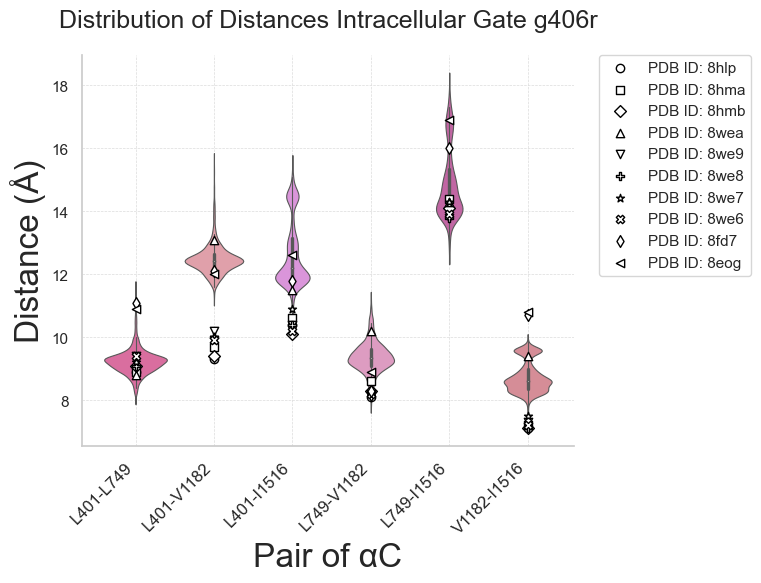

In [6]:

# Example usage
alias_dict = {
    'L401-L749':'CA_LEU401_CA-LEU749_CA',
    'L401-V1182':'CA_LEU401_CA-VAL1182_CA',
    'L401-I1516':'CA_LEU401_CA-ILE1516_CA',
    'L749-V1182':'CA_LEU749_CA-VAL1182_CA',
    'L749-I1516':'CA_LEU749_CA-ILE1516_CA',
    'V1182-I1516':'CA_VAL1182_CA-ILE1516_CA'
}

# Optional list of custom colors for the violin plots
custom_colors = ['#eb5c9e', '#ea96a3', '#e689e6', '#e891c3', '#d057a8', '#e1818f']

# Experimental distances to overlay (example values, with lists for each alias)
exp_distances_list = [
    { #8hlp
    'L401-L749':[8.9],
    'L401-V1182':[9.3],
    'L401-I1516':[10.4],
    'L749-V1182':[8.1],
    'L749-I1516':[14.1],
    'V1182-I1516':[7.1]
}, { #8hma
    'L401-L749':[8.9],
    'L401-V1182':[9.7],
    'L401-I1516':[10.6],
    'L749-V1182':[8.6],
    'L749-I1516':[14.4],
    'V1182-I1516':[7.2]
}, { #8hmb
    'L401-L749':[9.1],
    'L401-V1182':[9.4],
    'L401-I1516':[10.1],
    'L749-V1182':[8.3],
    'L749-I1516':[14.1],
    'V1182-I1516':[7.1]
}, { #8wea
    'L401-L749':[8.8],
    'L401-V1182':[13.1],
    'L401-I1516':[11.5],
    'L749-V1182':[10.2],
    'L749-I1516':[14.3],
    'V1182-I1516':[9.4]
}, { #8we9
    'L401-L749':[9.4],
    'L401-V1182':[10.2],
    'L401-I1516':[10.4],
    'L749-V1182':[8.1],
    'L749-I1516':[13.8],
    'V1182-I1516':[7.3]
}, { #8we8
    'L401-L749':[9.1],
    'L401-V1182':[10.0],
    'L401-I1516':[10.4],
    'L749-V1182':[8.3],
    'L749-I1516':[13.8],
    'V1182-I1516':[7.1]
}, { #8we7
    'L401-L749':[9.2],
    'L401-V1182':[10.0],
    'L401-I1516':[10.9],
    'L749-V1182':[8.2],
    'L749-I1516':[14.3],
    'V1182-I1516':[7.5]
}, { #8we6
    'L401-L749':[9.4],
    'L401-V1182':[9.9],
    'L401-I1516':[10.2],
    'L749-V1182':[8.2],
    'L749-I1516':[13.9],
    'V1182-I1516':[7.2]
}, { #8fd7
    'L401-L749':[11.1],
    'L401-V1182':[12.1], #1162
    'L401-I1516':[11.8], #1468
    'L749-V1182':[8.3], #1162
    'L749-I1516':[16],
    'V1182-I1516':[10.7]
}, { #
    'L401-L749':[10.9],
    'L401-V1182':[12.0],
    'L401-I1516':[12.6],
    'L749-V1182':[8.9],
    'L749-I1516':[16.9],
    'V1182-I1516':[10.8]
}
]
# Labels for the datasets
dataset_labels = ['PDB ID: 8hlp', 'PDB ID: 8hma', 'PDB ID: 8hmb','PDB ID: 8wea','PDB ID: 8we9','PDB ID: 8we8','PDB ID: 8we7','PDB ID: 8we6','PDB ID: 8fd7','PDB ID: 8eog']

# Custom colors for each PDB dataset
pdb_colors = ['#ff5733', '#33ff57', '#3375ff', '#ff33c4', '#ffd633', '#33fff5']

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df_g406r_masked, alias_dict, exp_distances_list=exp_distances_list, title_custom_add='Intracellular Gate g406r', colors=custom_colors, fig_width=6, fig_height=6, dataset_labels=dataset_labels, pdb_colors=None)


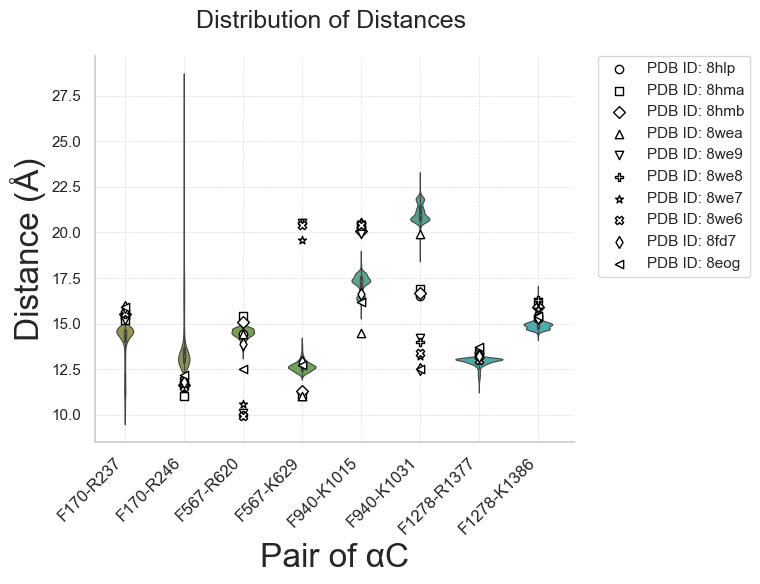

In [7]:
# Gating charges vs the aromatic middle in S2
alias_dict = {
    'F170-R237': 'CA_ARG237_CA-PHE170_CA',
    'F170-R246': 'CA_ARG246_CA-PHE170_CA',
    'F567-R620': 'CA_ARG620_CA-PHE567_CA',
    'F567-K629': 'CA_LYS629_CA-PHE567_CA',####
    'F940-K1015': 'CA_LYS1015_CA-PHE940_CA',
    'F940-K1031': 'CA_ARG1031_CA-PHE940_CA',
    'F1278-R1377': 'CA_ARG1377_CA-PHE1278_CA',
    'F1278-K1386': 'CA_LYS1386_CA-PHE1278_CA',
    #'F1278-R1390': 'CA_ARG1279_CA-PHE1167_CA',
}

# Optional list of custom colors for the violin plots
custom_colors = ['#9fa046','#92a348', '#7aaa48','#6aae52', '#4fb38c','#4aac99','#43b5b1','#3ebbbd']

# Experimental distances to overlay (multiple datasets with lists for each alias)
exp_distances_list = [
    { #8hlp
    'F170-R237': [15.3],
    'F170-R246': [11.8],
    'F567-R620': [14.4],
    'F567-K629': [11.2],
    'F940-K1015': [20.3],
    'F940-K1031': [16.5],
    'F1278-R1377': [13.4],
    'F1278-K1386':[15.3],
    #'F1278-R1390': [20.2]
   },
    { #8hma
     'F170-R237': [15.2],
    'F170-R246': [11.0],
    'F567-R620': [15.4],
    'F567-K629': [11.0],
    'F940-K1015': [20.4],
    'F940-K1031': [16.9],
    'F1278-R1377': [13.4],
    'F1278-K1386':[16.0],
    #'F1278-R1390': [20.8]
    },
    { #8hmb
    'F170-R237': [15.5],
    'F170-R246': [11.6],
    'F567-R620': [15.1],
    'F567-K629': [11.3],
    'F940-K1015': [20.1],
    'F940-K1031': [16.7],
    'F1278-K1386':[15.9],
   # 'F1278-R1390': [20.5]    
    },
    { #8wea
    'F170-R237': [15.6],
    'F170-R246': [11.8],
    'F567-R620': [14.4],
    'F567-K629': [11.0],
    'F940-K1015': [14.5], #960
    'F940-K1031': [19.9], #960,1027
    'F1278-R1377': [13.3],
    'F1278-K1386':[15.7],
    #'F1278-R1390': [21.2]   
    },
    { #8we9
    'F170-R237': [15.2],
    'F170-R246': [11.6],
    'F567-R620': [10.1],
    'F567-K629': [20.5],
    'F940-K1015': [19.9],
    'F940-K1031': [14.2],
    'F1278-R1377': [13.5],
    'F1278-K1386':[16.2],
    #'F1278-R1390': [20.9]    
    },
    { #8we8
    'F170-R237': [15.5],
    'F170-R246': [12.0],
    'F567-R620': [10.0],
    'F567-K629': [20.5],
    'F940-K1015': [20.5],
    'F940-K1031': [14.0],
    'F1278-R1377': [13.3],
    'F1278-K1386':[16.3],
    #'F1278-R1390': [21.5]    
    },
    { #8we7
    'F170-R237': [15.6],
    'F170-R246': [11.4],
    'F567-R620': [10.6],
    'F567-K629': [19.6],
    'F940-K1015': [20.6],
    'F940-K1031': [13.2],
    'F1278-R1377': [13.3],
    'F1278-K1386': [15.8], #1278,1386
    #'F1278-R1390': [20.2]    
    },
    { #8we6
    'F170-R237': [15.6],
    'F170-R246': [11.5],
    'F567-R620': [9.9],
    'F567-K629': [20.4],
    'F940-K1015': [20.4],
    'F940-K1031': [13.4],
    'F1278-R1377': [13.0],
    'F1278-K1386': [15.3], #1258
    #'F1278-R1390': [21.4]    
    },
    { #8fd7
    'F170-R237': [15.9],
    'F170-R246': [11.8],
    'F567-R620': [13.9],
    'F567-K629': [12.9], 
    'F940-K1015': [16.6], #F944,995
    'F940-K1031': [12.5],
    'F1278-R1377': [13.2], #1258,1329
    'F1278-K1386': [15.3],
    #'F1278-R1390': [20.2] #1258,1342
    },
    { #8eog
    'F170-R237': [15.9],
    'F170-R246': [12.2],
    'F567-R620': [12.5],
    'F567-K629': [12.7],
    'F940-K1015': [16.2],
    'F940-K1031': [12.5],
    'F1278-R1377': [13.7],
    'F1278-K1386': [15.4],
    #'F1278-R1390': [20.5]    
    }
]

# Labels for the datasets
dataset_labels = ['PDB ID: 8hlp', 'PDB ID: 8hma', 'PDB ID: 8hmb','PDB ID: 8wea','PDB ID: 8we9','PDB ID: 8we8','PDB ID: 8we7','PDB ID: 8we6','PDB ID: 8fd7','PDB ID: 8eog']

# Custom colors for each PDB dataset
pdb_colors = ['#AC5336', '#D77614','#F99E09','#AC5336','#AB524D','#6BD0A3','#50C878','#88D499']

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df_wt_masked , alias_dict, exp_distances_list=exp_distances_list, title_custom_add='', colors=custom_colors, fig_width=6, fig_height=6, dataset_labels=dataset_labels, pdb_colors=None)


In [10]:
def plot_split_violin(df, alias_dict, title_custom_add='', fig_width=6, fig_height=6, colors=None):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    aliases = list(alias_dict.keys())
    rec = []

    for alias, (colA, colB) in alias_dict.items():
        if colA in df:
            for v in pd.to_numeric(df[colA], errors="coerce").dropna():
                rec.append({"Alias": alias, "Distance": v, "Dataset": "A"})
        else:
            print(f"Warning: missing column {colA}")

        if colB in df:
            for v in pd.to_numeric(df[colB], errors="coerce").dropna():
                rec.append({"Alias": alias, "Distance": v, "Dataset": "B"})
        else:
            print(f"Warning: missing column {colB}")

    plot_df = pd.DataFrame(rec)
    if plot_df.empty:
        print("No numeric distances found (all NaN after coercion or missing columns).")
        return

    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})
    plt.figure(figsize=(fig_width, fig_height))

    palette = colors if colors is not None else sns.color_palette("coolwarm", 2)

    sns.violinplot(
        data=plot_df,
        x="Alias",
        y="Distance",
        hue="Dataset",
        order=aliases,
        hue_order=["A", "B"],
        split=True,
        inner="box",
        cut=0,
        linewidth=0.8,
        palette=palette
    )

    plt.title(f"Distribution of Distances {title_custom_add}", fontsize=18, weight="light", pad=20)
    plt.xlabel("Pair of αC", fontsize=24, weight="light")
    plt.ylabel("Distance (Å)", fontsize=24, weight="light")
    plt.grid(True, linestyle="--", linewidth=0.5, color="#dcdcdc")
    plt.xticks(rotation=45, ha="right", fontsize=12, weight="light")
    sns.despine()
    plt.tight_layout()

    # optional: remove legend if you don't want it
    # plt.legend_.remove()

    plt.show()


In [9]:
alias_dict = {
    "VSDI-GLU160": ("shortest_LYS234-GLU160", "shortest_ARG237-GLU160"),
    "VSDI-GLU173": ("shortest_ARG243-GLU173", "shortest_ARG246-GLU173"),
    "VSDII-GLU570": ("shortest_ARG620-GLU570", "shortest_ARG590-GLU570"),
    "VSDII-GLU602": ("shortest_ARG620-GLU602", "shortest_ARG623-GLU602"),
    "VSDIII-GLU602": ("shortest_ARG620-GLU602", "shortest_ARG623-GLU602"),
    "VSDIII-GLU602": ("shortest_ARG620-GLU602", "shortest_ARG623-GLU602"),
    "VSDIV": ("shortest_LYS1386-GLU1285", "shortest_ARG1390-GLU1285"),
}

plot_split_violin(df_mask6, alias_dict)


NameError: name 'df_mask6' is not defined

In [ ]:
df_mask6

In [ ]:
df_mask6["shortest_LYS234-GLU160"].min()

In [ ]:
df_mask6["shortest_ARG237-GLU160"].min()

In [ ]:
df_mask6["shortest_ARG237-GLU160"].max()

In [ ]:
df_mask6["shortest_ARG240-GLU163"].max()

In [ ]:
df_mask6["shortest_ARG240-GLU163"].min()

In [ ]:
df_mask6["shortest_LYS234-GLU160"].max()

In [ ]:
df_mask6["shortest_LYS234-GLU163"].min()

In [ ]:
df_mask6["shortest_LYS234-GLU163"].max()

In [ ]:
df_mask6["shortest_ARG240-GLU173"].min()

In [ ]:
df_mask6["shortest_ARG240-GLU173"].max()

In [ ]:
df_mask6["shortest_LYS1386-GLU1285"].min()

In [ ]:
df_mask6["shortest_LYS1386-GLU1285"].max()

In [ ]:
df_mask6["shortest_ARG1390-GLU1285"].min()


In [ ]:
For VSDI
'shortest_LYS234-GLU160'
'shortest_ARG237-GLU160'

'shortest_ARG243-GLU173'
'shortest_ARG246-GLU173'

For VSDII
shortest_ARG620-GLU570
shortest_ARG623-GLU570

shortest_ARG620-GLU602
shortest_ARG623-GLU602

shortest_ARG626-GLU607
shortest_LYS629-GLU60



For VSDIII
shortest_ARG1383-GLU1285
shortest_ARG1377-GLU1322


For VSDIV

In [ ]:
for col in df_mask6.columns:
    print(col)


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distances_by_alias_violin_overlay(
    df1,
    df2,
    alias_dict,
    df1_label="Dataset 1",
    df2_label="Dataset 2",
    exp_distances_list=None,     # optional: list of dicts like [{alias:[...], ...}, {...}]
    dataset_labels=None,         # optional: labels for exp_distances_list
    pdb_colors=None,             # optional: colors for exp points
    title_custom_add='',
    colors=None,                 # optional: [color_df1, color_df2]
    alpha=0.45,                  # transparency for violins
    fig_width=6,
    fig_height=6,
    linewidth=0.8,
):
    """
    Overlay violin plots from two dataframes at the same x positions with transparency.

    alias_dict maps display alias -> column name in each dataframe.
    Both df1 and df2 are expected to have those columns (some can be missing).
    """

    aliases_in_order = list(alias_dict.keys())

    def _to_long(df, dataset_name):
        records = []
        for alias in aliases_in_order:
            col = alias_dict[alias]
            if col not in df.columns:
                print(f"Warning: Column '{col}' not found in {dataset_name}; alias '{alias}' will appear empty.")
                records.append({"Alias": alias, "Distance": None, "Dataset": dataset_name})
                continue

            distances = df[col].dropna()
            if len(distances) == 0:
                records.append({"Alias": alias, "Distance": None, "Dataset": dataset_name})
            else:
                records.extend(
                    {"Alias": alias, "Distance": d, "Dataset": dataset_name}
                    for d in distances.tolist()
                )
        return records

    long_records = []
    long_records.extend(_to_long(df1, df1_label))
    long_records.extend(_to_long(df2, df2_label))

    if not long_records:
        print("No distances found to plot after checking provided columns.")
        return

    plot_df = pd.DataFrame(long_records)
    plot_df["Alias"] = pd.Categorical(plot_df["Alias"], categories=aliases_in_order, ordered=True)

    sns.set(style="whitegrid", rc={"grid.linewidth": 0.6, "grid.color": "#e0e0e0"})

    # Colors for the two overlaid datasets
    if colors is not None and len(colors) == 2:
        palette = {df1_label: colors[0], df2_label: colors[1]}
    else:
        # default two distinct colors
        pal2 = sns.color_palette("Set2", 2)
        palette = {df1_label: pal2[0], df2_label: pal2[1]}

    plt.figure(figsize=(fig_width, fig_height))

    ax = sns.violinplot(
        x="Alias",
        y="Distance",
        hue="Dataset",
        data=plot_df,
        order=aliases_in_order,
        palette=palette,
        dodge=False,        # crucial: overlap instead of side-by-side
        cut=0,
        inner="box",
        linewidth=linewidth,
    )

    # Set alpha on the filled violin bodies (PolyCollection objects)
    # (Leave box/lines opaque for readability)
    for coll in ax.collections:
        # Many collections are created; only PolyCollections are the violin bodies.
        # This heuristic works well in practice:
        try:
            coll.set_alpha(alpha)
        except Exception:
            pass

    # Optional: overlay experimental distances (kept similar to your original)
    if exp_distances_list and dataset_labels:
        if pdb_colors and len(pdb_colors) == len(exp_distances_list):
            colors_for_pdb = pdb_colors
        else:
            colors_for_pdb = ["black"] * len(exp_distances_list)

        marker_styles = ['o', 's', 'D', '^', 'v', 'P', '*', 'X', 'd', '<', '>']
        used_label = [False] * len(exp_distances_list)

        for i, exp_distances_dict in enumerate(exp_distances_list):
            for alias, exp_distances in exp_distances_dict.items():
                if alias not in aliases_in_order:
                    continue
                xpos = aliases_in_order.index(alias)
                for exp_distance in exp_distances:
                    ax.scatter(
                        [xpos], [exp_distance],
                        facecolors="white",
                        edgecolors=colors_for_pdb[i],
                        s=36,
                        zorder=6,
                        marker=marker_styles[i % len(marker_styles)],
                        label=(dataset_labels[i] if not used_label[i] else None)
                    )
                    used_label[i] = True

    ax.set_title(f"Distribution of Distances {title_custom_add}", fontsize=18, weight="light", pad=20)
    ax.set_xlabel("Pair of αC", fontsize=24, weight="light")
    ax.set_ylabel("Distance (Å)", fontsize=24, weight="light")
    ax.grid(True, linestyle="--", linewidth=0.5, color="#dcdcdc")
    plt.xticks(rotation=45, ha="right", fontsize=12, weight="light")
    sns.despine()
    plt.tight_layout()

    # Legend: keep one for datasets + optional exp points
    handles, labels = ax.get_legend_handles_labels()
    if any(lbl for lbl in labels):
        ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)

    plt.show()


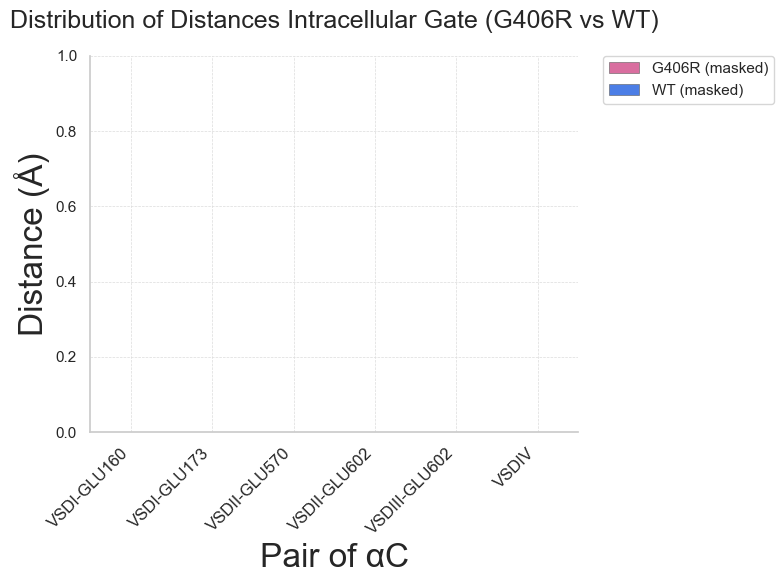

In [12]:
plot_distances_by_alias_violin_overlay(
    df1=df_g406r_masked,
    df2=df_wt_masked,
    alias_dict=alias_dict,
    df1_label="G406R (masked)",
    df2_label="WT (masked)",
    colors=["#eb5c9e", "#3375ff"],   # <- ONLY 2 colors, one per DF
    alpha=0.35,
    title_custom_add="Intracellular Gate (G406R vs WT)",
    fig_width=6,
    fig_height=6,
    exp_distances_list=exp_distances_list,
    dataset_labels=dataset_labels,
    pdb_colors=None,  # or give a list same length as exp_distances_list
)
